In [48]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [49]:
df = pd.read_csv('DOHMH_New_York_City_Restaurant_Inspection_Results_20250608.csv')

In [50]:
df

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location Point1
0,50166973,DAMAJAGUA RESTAURANT,Manhattan,5085,BROADWAY,10034.0,6463142720,NaN,01/01/1900,NaN,...,NaN,40.870709,-73.914762,112.0,10.0,30700.0,1065015.0,1.022430e+09,MN01,NaN
1,50154587,EAT MANILA LLC,Brooklyn,2123,CATON AVENUE,11226.0,9175848564,NaN,01/01/1900,NaN,...,NaN,40.652791,-73.959737,314.0,40.0,50803.0,3397264.0,3.050630e+09,BK42,NaN
2,50167826,ALL STAR BURGERS LLC,Brooklyn,154,CLINTON AVENUE,11205.0,3475995978,NaN,01/01/1900,NaN,...,NaN,40.693653,-73.968930,302.0,35.0,18700.0,3054290.0,3.018870e+09,BK68,NaN
3,50136213,ABDUL BATIN,Manhattan,17,WEST 125 STREET,10027.0,3478445060,NaN,01/01/1900,NaN,...,NaN,40.806692,-73.942912,110.0,9.0,20000.0,1053503.0,1.017230e+09,MN11,NaN
4,50165654,COOCOOCACHOO,Manhattan,289,MERCER STREET,10003.0,6462701552,NaN,01/01/1900,NaN,...,NaN,40.730176,-73.993902,102.0,1.0,5900.0,1008838.0,1.005480e+09,MN23,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285618,50053453,YOGURT CITY,Brooklyn,2027,EMMONS AVENUE,11235.0,7183391093,Frozen Desserts,04/02/2025,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.583719,-73.947233,315.0,48.0,60800.0,3392752.0,3.087790e+09,BK17,NaN
285619,50108576,COCOA BEAN JUICE AND SALAD BAR,Brooklyn,1510,NOSTRAND AVENUE,11226.0,9148434241,Caribbean,05/14/2024,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.649312,-73.949426,317.0,40.0,82400.0,3117360.0,3.051080e+09,BK95,NaN
285620,40730585,DEUX AMIS,Manhattan,356,EAST 51 STREET,10022.0,2122301117,French,07/30/2024,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.754847,-73.966544,106.0,4.0,9800.0,1039614.0,1.013430e+09,MN19,NaN
285621,50015155,LUCKY 13 SALOON,Brooklyn,644,SACKETT STREET,11217.0,7185960666,American,06/01/2022,Violations were cited in the following area(s).,...,Cycle Inspection / Initial Inspection,40.678423,-73.983614,306.0,39.0,11900.0,3007208.0,3.004340e+09,BK37,NaN


In [51]:
print(df.columns)

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE', 'Latitude', 'Longitude',
       'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL',
       'NTA', 'Location Point1'],
      dtype='object')


In [60]:
df['INSPECTION DATE'] = pd.to_datetime(df['INSPECTION DATE'], errors='coerce')
df = df[df['INSPECTION DATE'].notna()].copy()
df['year'] = df ['INSPECTION DATE'].dt.year

In [61]:
df = df[df['INSPECTION DATE'].dt.year >= 2014]

In [62]:
print("Basic Stats:") 
print(df['SCORE'].describe())

Basic Stats:
count    270511.000000
mean         24.398572
std          18.300465
min           0.000000
25%          12.000000
50%          21.000000
75%          32.000000
max         168.000000
Name: SCORE, dtype: float64


In [63]:
df = df[df['INSPECTION DATE'].notna() & df['SCORE'].notna()]

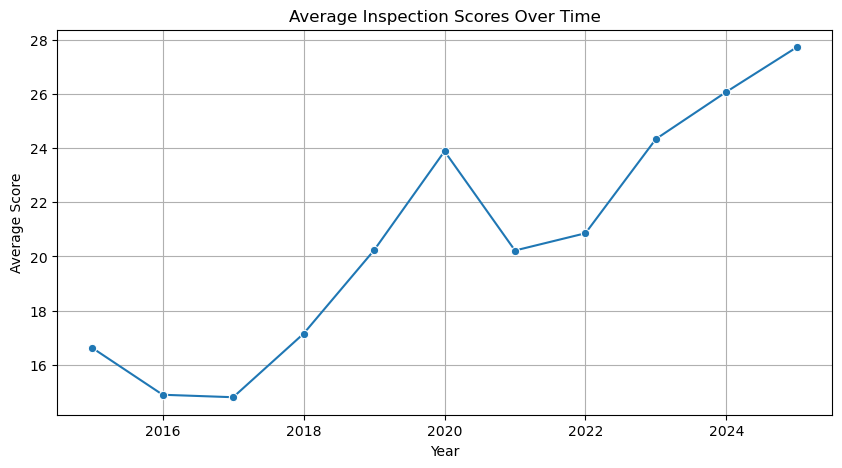

In [64]:
avg_scores_per_year = df.groupby('year')['SCORE'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=avg_scores_per_year, x='year', y='SCORE', marker='o')
plt.title('Average Inspection Scores Over Time')
plt.ylabel('Average Score')
plt.xlabel('Year')
plt.grid(True)
plt.show()

In [65]:
df['SCORE'] = pd.to_numeric(df['SCORE'], errors = 'coerce')
df = df[df['SCORE'].notna()].copy()
df = df[df['BORO'].notna()].copy()

In [66]:
df['BORO'] = df['BORO'].str.title()

In [67]:
avg_scores_boro = df.groupby('BORO')['SCORE'].mean().sort_values()

In [68]:
print(avg_scores_boro)

BORO
Staten Island    21.527522
Bronx            23.109200
Manhattan        23.714783
Brooklyn         24.803111
Queens           25.900904
Name: SCORE, dtype: float64


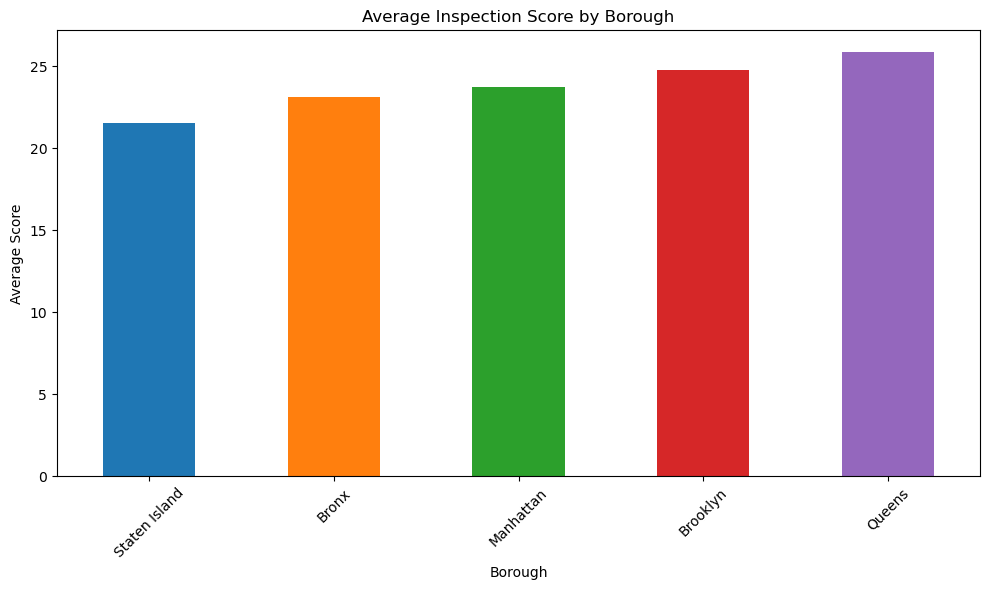

In [72]:
avg_scores_boro = df.groupby('BORO')['SCORE'].mean().sort_values()
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
plt.figure(figsize=(10, 6))
avg_scores_boro.plot(kind='bar', color=colors)
plt.title('Average Inspection Score by Borough')
plt.ylabel('Average Score')
plt.xlabel('Borough')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [73]:
top_violations = df['VIOLATION DESCRIPTION'].value_counts().head(3) 
print("Top 3 Violation Types:")
print(top_violations)

Top 3 Violation Types:
VIOLATION DESCRIPTION
Non-food contact surface or equipment made of unacceptable material, not kept clean, or not properly sealed, raised, spaced or movable to allow accessibility for cleaning on all sides, above and underneath the unit.    33638
Establishment is not free of harborage or conditions conducive to rodents, insects or other pests.                                                                                                                         22996
Food contact surface not properly washed, rinsed and sanitized after each use and following any activity when contamination may have occurred.                                                                             18449
Name: count, dtype: int64


In [74]:
valid_grades = ['A', 'B', 'C']
df = df[df['GRADE'].isin(valid_grades)]

<Figure size 1000x600 with 0 Axes>

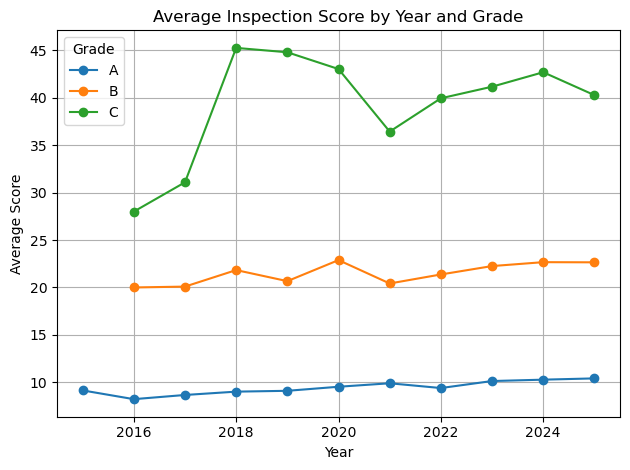

In [75]:
avg_score_by_year_grade = df.groupby(['year', 'GRADE'])['SCORE'].mean().unstack()
plt.figure(figsize=(10, 6))
avg_score_by_year_grade.plot(marker='o')
plt.title('Average Inspection Score by Year and Grade')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.grid(True)
plt.legend(title='Grade')
plt.tight_layout()

In [76]:
top_violations = df['VIOLATION DESCRIPTION'].value_counts().head(3)

In [78]:
custom_labels = {
top_violations.index[0]: "Unclean Non-Food Surfaces",
    top_violations.index[1]: "Rodent or Pest Conditions", 
    top_violations.index[2]: "Improper Surface Sanitizing"
}

In [79]:
top_violations_short = top_violations.rename(index=custom_labels)

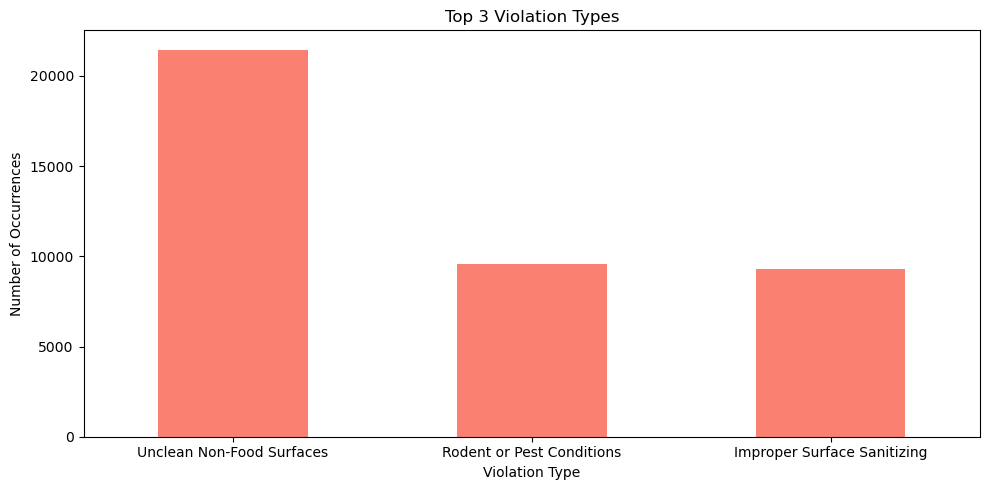

In [81]:
plt.figure(figsize=(10, 5))
top_violations_short.plot(kind='bar', color='salmon')
plt.title('Top 3 Violation Types')
plt.xlabel('Violation Type')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [82]:
conclusion = """This analysis shows that restaurant inspection scores have improved over time. Grade A establishments consistently receive better (lower) scores.
Some boroughs perform better than others in food safety, with Manhattan and Staten Island showing stronger average scores.
The top violations found are related to surface cleanliness, pest control, and sanitizing — all of which are preventable.
Overall, NYC's food safety policies appear to be effective in improving restaurant standards. """

In [83]:
print(conclusion)

This analysis shows that restaurant inspection scores have improved over time. Grade A establishments consistently receive better (lower) scores.
Some boroughs perform better than others in food safety, with Manhattan and Staten Island showing stronger average scores.
The top violations found are related to surface cleanliness, pest control, and sanitizing — all of which are preventable.
Overall, NYC's food safety policies appear to be effective in improving restaurant standards. 
